# A short introduction to `numpy`, `scipy` and `matplotlib`

## TOC
* [integrating ordinary differential equations](#ode)

*** 

<a id="ode"></a>
## Integrating ordinary differential equations

Being able to integrate simple differential equations is very useful in many areas of physics or cosmology. For ordinary differential equations, the standard method is the Runge-Kutta method, which is a higher order implementation of the historical Euler method. 

scipy provides us with a numerical integration package. Let's look at a first example.

## A First example

Differential equation:

$$
y'+ y = x, \ \ \mathrm{with}\ \ y(0) = 1
$$

In [8]:
import pylab as pl 
pl.rcParams.update({'font.size': 16})

import scipy.integrate as integrate

def dy_dx(y, x):
    return x - y

xx = np.linspace(0., 5., 100)
y0 = 1.
yy = integrate.odeint(dy_dx, y0, xx)

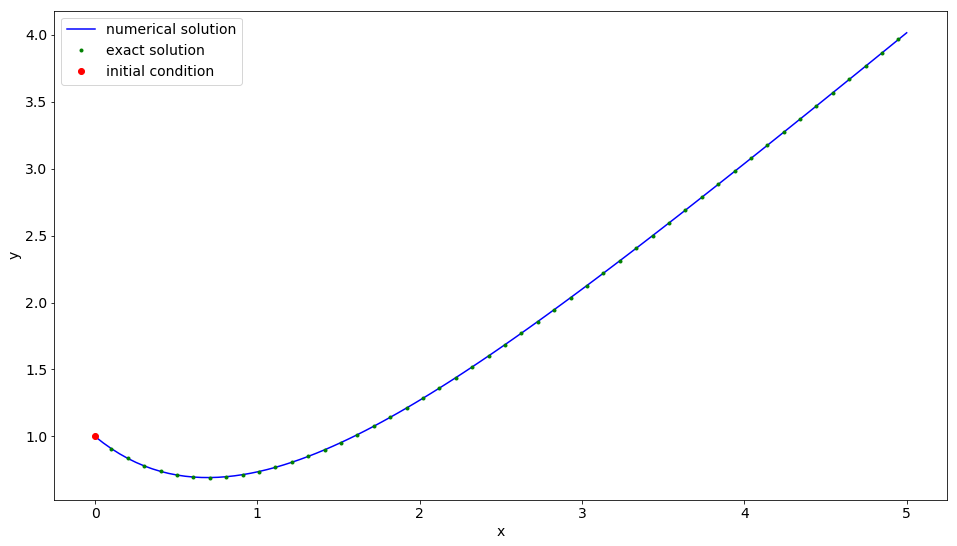

In [9]:
# now, we plot the result of our numerical integration
# and compare it with the exact solution (by chance, has one)

def exact_solution(x):
    return x - 1. + 2. * np.exp(-x)

pl.rcParams.update({'font.size': 14})
pl.figure(figsize=(16,9))
pl.plot(xx, yy, 'b-', label='numerical solution')
pl.plot(xx[::2], exact_solution(xx[::2]), 'g.', label='exact solution')
pl.plot(0., y0, 'ro', label='initial condition')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='upper left')

Text(0,0.5,'exact-numerical')

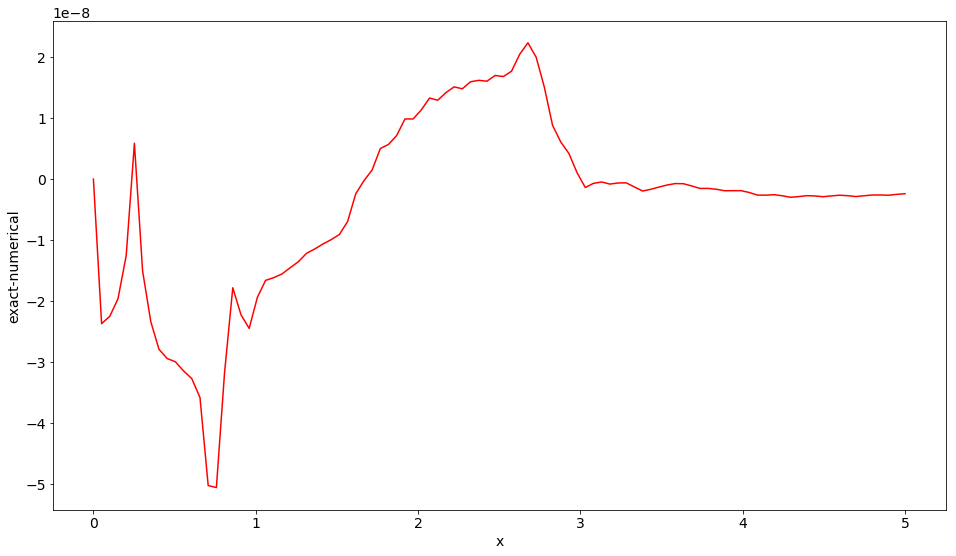

In [10]:
# pretty close ! 
# let's compare the exact and numerical solutions more closely
pl.figure(figsize=(16,9))
pl.plot(xx, exact_solution(xx)-yy.flatten(), 'r-')
pl.xlabel('x')
pl.ylabel('exact-numerical')

In [11]:
# what if the boundary condition is not at zero ? 
# for example: $y(2) == 2$
# the solution I know, is to solve backwards and forwards

xx_forwards  = np.linspace(2, 10, 100)
yy_forwards = integrate.odeint(dy_dx, 2., xx_forwards)
xx_backwards = np.linspace(2,  0., 50)
yy_backwards = integrate.odeint(dy_dx, 2., xx_backwards)

(0, 10.0)

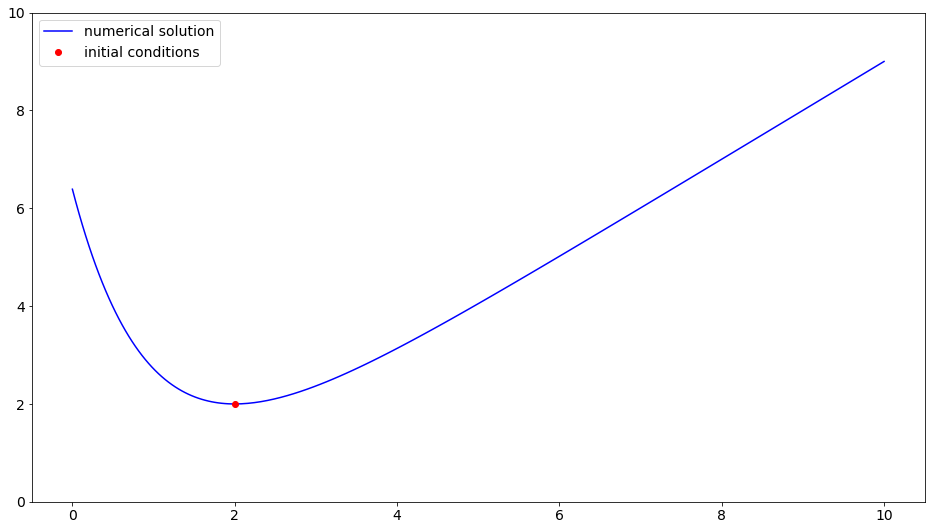

In [12]:
pl.figure(figsize=(16,9))
pl.plot(xx_forwards, yy_forwards, 'b-', label='numerical solution')
pl.plot(xx_backwards, yy_backwards, 'b-')
pl.plot(2., 2., 'ro', label='initial conditions')
pl.legend(loc='upper left')
pl.ylim((0, 10.))

### Second order ordinary differential equations

Finally, let's consider a second order differential equation, such as, for example, the pendulum equation:

$$
\theta''(t) + b \theta'(t) + c \sin\theta(t) = 0
$$

it may be solved with `odeint` provided that we express it as a first order ordinary differential equation. Classically, this is done as follows:

$$
\begin{bmatrix} \theta \\ \theta' \end{bmatrix}' = \begin{bmatrix} \theta' \\ -b \theta' -c \sin\theta\end{bmatrix} = \mathbf{F}\left(\begin{bmatrix} \theta \\  \theta' \end{bmatrix}\right)
$$

In [13]:
def dy_dx(y, t, b, c):
    theta, d_theta_dt = y
    return [d_theta_dt, -b * d_theta_dt -c * np.sin(theta)]

b, c = 0.25, 5.
y0 = [np.pi-0.1, 0.]
t = np.linspace(0., 10, 100)
y = integrate.odeint(dy_dx, y0, t, args=(b, c,))

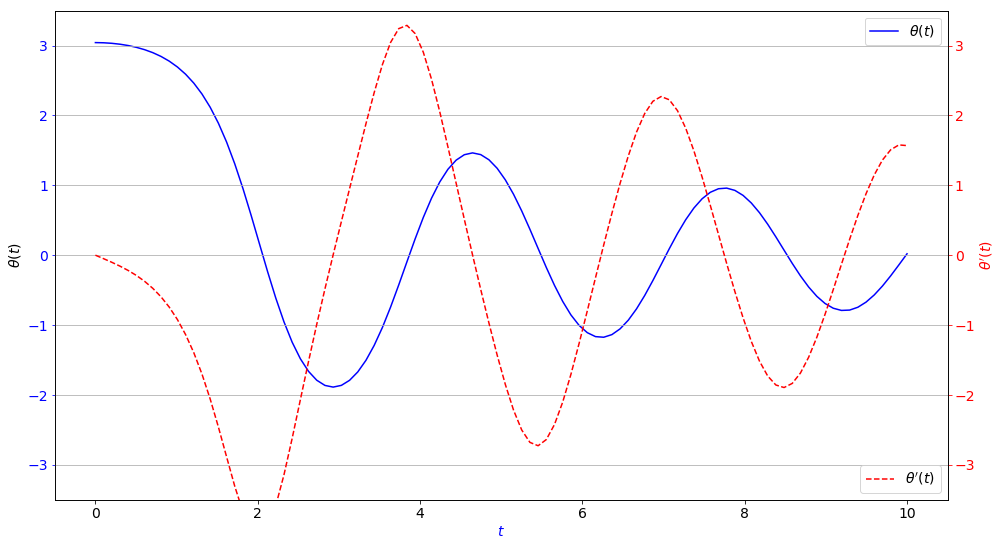

In [14]:
pl.figure(figsize=(16,9))
ax = pl.subplot(111)
pl.plot(t, y.T[0], 'b-', label='$\\theta(t)$')
pl.xlabel('$t$', color='b')
pl.ylabel('$\\theta(t)$')
pl.legend(loc='upper right')
pl.ylim((-3.5,3.5))
ax.tick_params('y', colors='b')

ax2 = pl.twinx()
ax2.plot(t, y.T[1], 'r--', label="$\\theta'(t)$")
pl.ylabel("$\\theta'(t)$", color='r')
pl.legend(loc='lower right')
pl.ylim((-3.5,3.5))
ax2.tick_params('y', colors='r')
pl.grid(1)

## Friedmann equation

We will see, during the cosmology class, that the cosmic expansion is governed by two differential equations that connect the scale parameter $a(t)$ and its derivatives to the matter-energy contents of the universe ($\Omega_m$, $\Omega_\Lambda$ ...) and thte Hubble constant $H_0 = \dot{a}/a$. 

We will see that the Friedmann equation can be combined into a single differential equation:
$$
\ddot{a} = -\frac{H_0^2}{2} \Omega_m \frac{\Omega_m a^{-3} + \Omega_r a^{-4} - 2 \Omega_\Lambda}{\dot{a}^2 / H_0^2 - \Omega_r a^{-2} - a^2 \Omega_\Lambda - (1-\Omega_m-\Omega_r-\Omega_\Lambda)}
$$

* Integrate numerically the Friedmann equation for the following values of the cosmological parameters:
  * $\Omega_m = 0.3, \Omega_\Lambda = 0, \Omega_r = 5\ 10^{-4}$
  * $\Omega_m = 0.3, \Omega_\Lambda = 0.7, \Omega_r = 5\ 10^{-4}$
  * $\Omega_m = 1.0, \Omega_\Lambda = 0, \Omega_r = 5\ 10^{-4}$
  * $\Omega_m = 3.0, \Omega_\Lambda = 0, \Omega_r = 5\ 10^{-4}$


In [3]:
from scipy import integrate

H0=71000/(3.E22)*(3600*24*365.E9)
omega_m = 0.3
omega_l = 0.0
omega_r = 5.E-4

def dy_dt(y,x, H0, omega_m, omega_r, omega_l):
    omega_k = 1. - omega_m - omega_r - omega_l
    a, adot = y[0], y[1]
    adotdot = -0.5 * H0**2 * omega_m * (omega_m / a**3 + omega_r / a**4 - 2 * omega_l) / (adot**2 / H0**2 - omega_r / a**2 - a**2 * omega_l - omega_k)
    return [adot, adotdot]

def adot(a, H0, omega_m, omega_r, omega_l):
    omega_k = 1 - omega_m - omega_r - omega_l
    return H0 * np.sqrt(omega_m / a + omega_r / a**2 + omega_k + omega_l * a**3)

def compute(H0, omega_m, omega_r, omega_l):
    a0 = (1., adot(1., H0, omega_m, omega_r, omega_l))
    t_forwards = np.linspace(0., 50, 100)
    a_forwards = integrate.odeint(dy_dt, a0, t_forwards, args=(H0, omega_m, omega_r, omega_l))
    t_backwards = np.linspace(0., -14, 100)
    a_backwards = integrate.odeint(dy_dt, a0, t_backwards, args=(H0, omega_m, omega_r, omega_l))
    return t_forwards, a_forwards, t_backwards, a_backwards


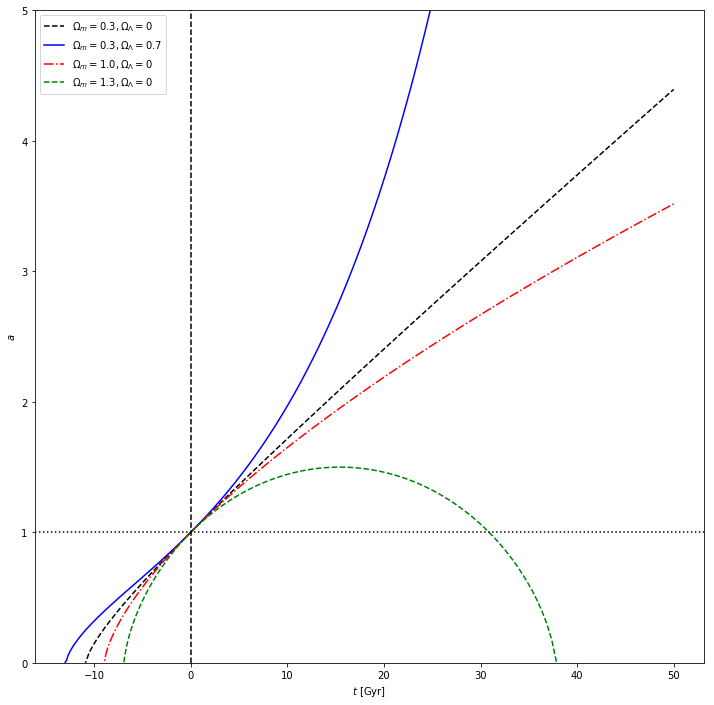

In [4]:
def plot(t_f, a_f, t_b, a_b, color='r', ls='-', label=''):
    idx = a_f.T[0] > 1.E-6
    pl.plot(t_f[idx], a_f.T[0][idx], color=color, ls=ls, label=label)
    idx = a_b.T[0] > 1.E-6
    pl.plot(t_b[idx], a_b.T[0][idx], color=color, ls=ls)
    t_f[:] = 0.
    a_f[:] = 0.
    t_b[:] = 0.
    a_b[:] = 0.


pl.figure(figsize=(12,12))
plot(*compute(H0, 0.3, 5.E-4, 0.0), ls='--', color='k', label='$\Omega_m=0.3, \Omega_\Lambda=0$')
plot(*compute(H0, 0.3, 5.E-4, 0.7), ls='-', color='b', label='$\Omega_m=0.3, \Omega_\Lambda=0.7$')
plot(*compute(H0, 1.0, 5.E-4, 0.0), ls='-.', color='r', label='$\Omega_m=1.0, \Omega_\Lambda=0$')
plot(*compute(H0, 3, 5.E-4, 0.0), ls='--', color='g', label='$\Omega_m=1.3, \Omega_\Lambda=0$')
pl.legend(loc='best')
pl.ylim((0., 5.))
pl.xlabel('$t$ [Gyr]')
pl.ylabel('$a$')
pl.axvline(0., color='k', ls='--')
pl.axhline(1., color='k', ls=':')